In [2]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn import preprocessing
from tqdm import tqdm

**Select the Data**

In [29]:
chunks_folder = 'chucks/chucks'

In [14]:
chunks_folder = 'ReducedChunks'

Function to join a folder into a CSV file

In [15]:
def join_folder(folder, csv_name):
    final_data = pd.DataFrame()
    chunk_data = []
    for file in tqdm(os.listdir(folder)):
        if file.endswith('.csv'):
            file_path = os.path.join(chunks_folder, file)
            data = pd.read_csv(file_path)
            chunk_data.append(data)
    final_data = pd.concat(chunk_data, ignore_index=True)
    final_data.to_csv(csv_name + '.csv', index=False)


In [16]:
file_name = 'data'
join_folder(chunks_folder, file_name)
data = pd.read_csv(file_name + '.csv', sep=';')
data

100%|██████████| 22/22 [00:02<00:00,  9.07it/s]


,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199995,2023-03-01 04:46:47,117.0,51.063446,3.739656,38.0,34.0,469.0,431.0,1292.0,1261.0,77.0,77.0,74.0,72.0,-2.2,0.0,10.9,0.0
2199996,2023-03-01 04:46:40,189.0,50.774965,3.873212,3.0,12.0,282.0,313.0,801.0,804.0,65.0,71.0,57.0,68.0,-2.2,0.0,10.9,0.0
2199997,2023-03-01 04:47:27,173.0,50.400794,4.457923,17.0,13.0,227.0,331.0,799.0,803.0,78.0,73.0,72.0,64.0,-2.2,0.0,10.9,0.0
2199998,2023-03-01 04:46:24,135.0,51.031679,3.726717,20.0,29.0,175.0,189.0,801.0,833.0,85.0,78.0,86.0,84.0,-2.2,0.0,10.9,0.0


Data cleaned

In [13]:
data = pd.read_csv('ar41_for_ulb_cleaned.csv', sep=';')
data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379969,2023-01-28 08:39:57,145.0,51.038288,3.756774,29.0,16.0,341.0,327.0,1417.0,1353.0,81.0,82.0,83.0,85.0,0.6,0.0,5.6,0.0
16379970,2023-01-28 08:43:03,191.0,50.930731,5.327744,27.0,26.0,289.0,276.0,795.0,801.0,77.0,79.0,70.0,72.0,0.6,0.0,5.6,0.0
16379971,2023-01-28 08:42:49,104.0,50.056842,4.492362,6.0,17.0,217.0,303.0,804.0,797.0,76.0,53.0,77.0,54.0,0.6,0.0,5.6,0.0
16379972,2023-01-28 08:45:21,186.0,51.246188,5.542875,36.0,38.0,162.0,200.0,801.0,800.0,77.0,83.0,77.0,80.0,0.6,0.0,5.6,0.0


Take a portion of the data

In [3]:
portion = 0.2
data = data.sample(frac=portion, random_state=42)
data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
15437382,2023-02-22 20:34:00,144.0,50.951906,3.780262,31.0,31.0,313.0,327.0,1102.0,1232.0,90.0,80.0,93.0,85.0,8.5,0.2,4.7,0.9
5396282,2023-09-05 05:16:12,154.0,50.849448,3.813797,40.0,36.0,407.0,393.0,1438.0,1433.0,88.0,86.0,84.0,84.0,15.9,0.0,9.7,0.7
13363544,2023-08-09 02:36:20,176.0,51.015715,3.774011,20.0,21.0,200.0,210.0,793.0,803.0,79.0,82.0,82.0,80.0,15.0,0.9,11.0,0.4
3305476,2023-05-16 10:28:02,102.0,50.873276,3.814787,37.0,33.0,193.0,207.0,795.0,810.0,85.0,84.0,87.0,87.0,11.1,0.0,19.6,2.6
14833669,2023-03-07 04:07:45,197.0,50.277293,4.414276,33.0,38.0,196.0,272.0,801.0,797.0,82.0,75.0,81.0,76.0,4.2,0.1,20.9,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237368,2023-05-11 01:52:45,185.0,51.190193,5.112672,18.0,14.0,227.0,334.0,803.0,797.0,78.0,62.0,76.0,57.0,10.2,0.1,8.0,1.4
1068130,2023-07-11 06:52:23,197.0,50.057235,4.492603,40.0,40.0,224.0,289.0,799.0,799.0,78.0,69.0,75.0,71.0,18.2,0.0,14.5,67.9
11896266,2023-03-15 04:01:49,115.0,50.095166,4.526235,22.0,17.0,193.0,279.0,801.0,800.0,79.0,66.0,77.0,63.0,2.3,0.1,11.9,1.1
15093739,2023-05-16 10:58:35,151.0,51.180549,3.575516,24.0,25.0,244.0,224.0,789.0,812.0,66.0,86.0,66.0,89.0,11.1,0.0,19.6,2.6


Test with diff of columns PC1 & PC2

In [4]:
# Dif of columns
df = pd.read_csv('chucks/chucks/chuck_0.csv', sep=';')

df['RS_E_InAirTemp_diff'] = df['RS_E_InAirTemp_PC1'] - df['RS_E_InAirTemp_PC2']
df['RS_E_OilPress_diff'] = df['RS_E_OilPress_PC1'] - df['RS_E_OilPress_PC2']
df['RS_E_RPM_diff'] = df['RS_E_RPM_PC1'] - df['RS_E_RPM_PC2']
df['RS_E_WatTemp_diff'] = df['RS_E_WatTemp_PC1'] - df['RS_E_WatTemp_PC2']
df['RS_T_OilTemp_diff'] = df['RS_T_OilTemp_PC1'] - df['RS_T_OilTemp_PC2']

df = df.drop(columns=['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2',
                      'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
                      'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2'])

df.to_csv("chunk1Diff.csv", sep=";", index=False)

In [5]:
data = pd.read_csv('chunk1Diff.csv', sep=';')
data

,timestamps_UTC,mapped_veh_id,lat,lon,temperature,precipitation,windspeed_10m,sum_pollen,RS_E_InAirTemp_diff,RS_E_OilPress_diff,RS_E_RPM_diff,RS_E_WatTemp_diff,RS_T_OilTemp_diff
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,14.8,0.0,18.6,0.1,4.0,17.0,-7.0,2.0,-1.0
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,14.4,0.0,19.1,1.1,1.0,-52.0,-2.0,0.0,-1.0
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,18.2,0.0,12.1,2.4,-2.0,52.0,-3.0,0.0,-2.0
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,19.9,0.2,25.0,12.6,-3.0,-24.0,-7.0,-4.0,-4.0
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,18.7,0.0,9.7,2.1,7.0,-55.0,6.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2023-04-03 16:05:20,186.0,51.215074,4.421298,9.3,0.0,18.1,165.2,-4.0,-28.0,6.0,-5.0,-7.0
99996,2023-04-03 16:05:32,146.0,51.015562,3.774646,9.3,0.0,18.1,165.2,10.0,-62.0,7.0,5.0,5.0
99997,2023-04-03 16:04:54,160.0,50.868371,3.814284,9.3,0.0,18.1,165.2,-12.0,41.0,-8.0,-11.0,-6.0
99998,2023-04-03 16:15:30,142.0,51.174112,4.901368,9.3,0.0,18.1,165.2,-7.0,14.0,0.0,-5.0,3.0


**Take columns of interest**

In [14]:
columns_of_interest = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
                         'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
                         'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
                         'precipitation', 'windspeed_10m', 'sum_pollen']

X = data[columns_of_interest].values

In [26]:
# For diff
columns_of_interest = ['RS_E_InAirTemp_diff', 'RS_E_OilPress_diff', 'RS_E_RPM_diff',
                        'RS_E_WatTemp_diff', 'RS_T_OilTemp_diff', 'temperature',
                        'precipitation', 'windspeed_10m', 'sum_pollen']

X = data[columns_of_interest].values


**Fuzzy algorithm**

Scale data

In [15]:
def scale(data):
    scaler = preprocessing.RobustScaler()
    return scaler.fit_transform(data)

Choose de number of clusters

6it [35:18, 353.05s/it]


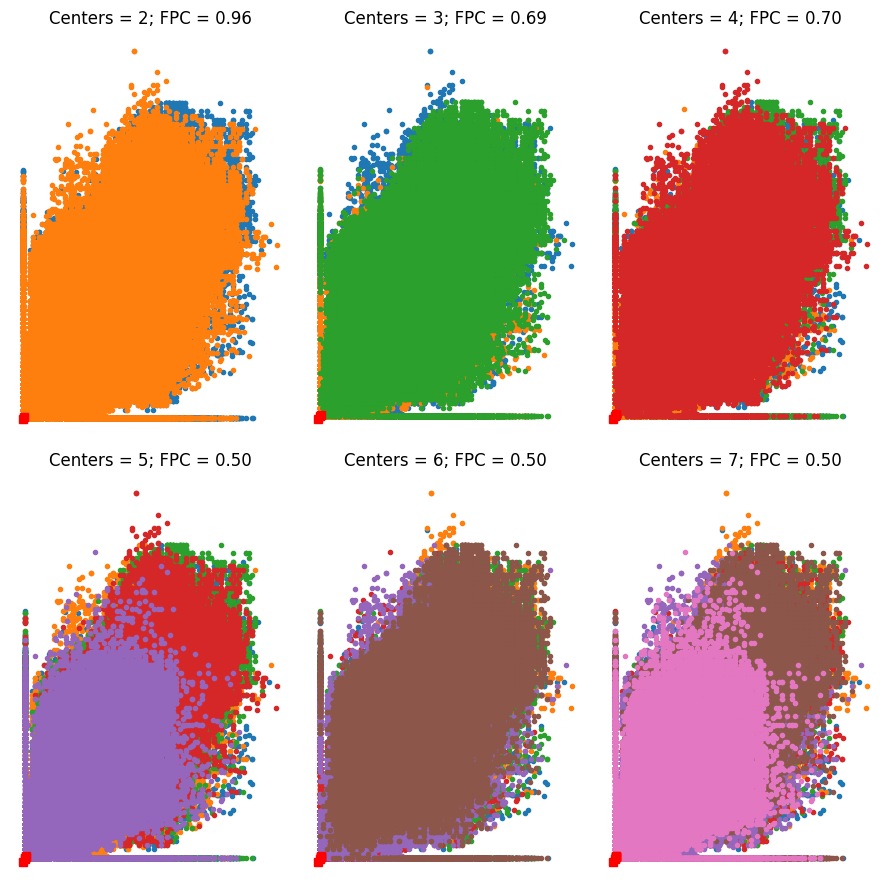

In [6]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(2, 3, figsize=(9, 9))
fpcs = []

for ncenters, ax in tqdm(enumerate(axes1.reshape(-1), 2)):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        scale(X).T, ncenters, 2, error=0.05, maxiter=1000, init=None, seed=3)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(X[cluster_membership == j, 0],
                X[cluster_membership == j, 1], '.')

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Fuzzy with a specified number of cluster

In [10]:
# Parameters of Fuzzy C-means
n_clusters = 4
m = 2
error_threshold = 0.005

# Execution of Fuzzy C-means
centers, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    scale(X).T, n_clusters, m, error=error_threshold, maxiter=1000, init=None, seed=3
)

fpc

0.9010659883948525

In [29]:
# Définir les paramètres Fuzzy C-means
n_clusters = 4
fuzziness = 2
data_T = scale(X).T

# Appliquer le clustering Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_T, n_clusters, fuzziness, error=0.005, maxiter=1000, init=None, seed=3
)

print(fpc)

# Calculer les valeurs d'appartenance pour chaque point de données
membership_values = np.argmax(u, axis=0)

cntr_T = cntr.T

distances = np.linalg.norm(data_T - cntr_T[:, membership_values], axis=0)


# Sauvegarder le DataFrame avec la colonne marquant les outliers
#df.to_csv('votre_fichier_marque_outliers.csv', index=False)

0.9010659883948525
Nombre d'outliers : 878038


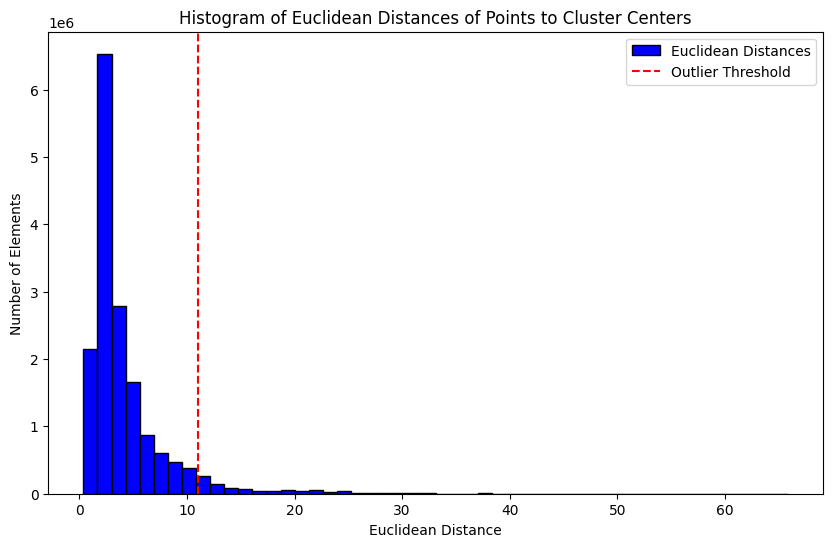

In [40]:
outlier_distance_threshold = 11
# Create a histogram of Euclidean distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=50, color='b', edgecolor='black', label='Euclidean Distances')
plt.axvline(x=outlier_distance_threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.title('Histogram of Euclidean Distances of Points to Cluster Centers')
plt.xlabel('Euclidean Distance')
plt.ylabel('Number of Elements')
plt.legend()
plt.show()

In [46]:
outliers = data[distances > outlier_distance_threshold]

df['is_outlier'] = (distances > outlier_distance_threshold).astype(int)

print("Number of outliers :", outliers.shape[0])
df

Number of outliers : 878038


,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,is_outlier
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1,0
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1,0
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4,0
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6,0
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379969,2023-01-28 08:39:57,145.0,51.038288,3.756774,29.0,16.0,341.0,327.0,1417.0,1353.0,81.0,82.0,83.0,85.0,0.6,0.0,5.6,0.0,0
16379970,2023-01-28 08:43:03,191.0,50.930731,5.327744,27.0,26.0,289.0,276.0,795.0,801.0,77.0,79.0,70.0,72.0,0.6,0.0,5.6,0.0,0
16379971,2023-01-28 08:42:49,104.0,50.056842,4.492362,6.0,17.0,217.0,303.0,804.0,797.0,76.0,53.0,77.0,54.0,0.6,0.0,5.6,0.0,0
16379972,2023-01-28 08:45:21,186.0,51.246188,5.542875,36.0,38.0,162.0,200.0,801.0,800.0,77.0,83.0,77.0,80.0,0.6,0.0,5.6,0.0,0


In [47]:
df.to_csv('Fuzzy_with_outlier.csv', index=False)

In [46]:
cluster_indices = np.argmax(u, axis=0)

elements_par_cluster = np.bincount(cluster_indices)

for cluster_num, count in enumerate(elements_par_cluster):
    print(f"Cluster {cluster_num + 1}: {count} éléments")

Cluster 1: 817368 éléments
Cluster 2: 1165091 éléments
Cluster 3: 1452169 éléments
Cluster 4: 12945346 éléments


Add cluster column

In [47]:
cluster_indices = np.argmax(u, axis=0)

data['cluster'] = cluster_indices

data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,cluster
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1,3
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1,3
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4,3
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6,3
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379969,2023-01-28 08:39:57,145.0,51.038288,3.756774,29.0,16.0,341.0,327.0,1417.0,1353.0,81.0,82.0,83.0,85.0,0.6,0.0,5.6,0.0,2
16379970,2023-01-28 08:43:03,191.0,50.930731,5.327744,27.0,26.0,289.0,276.0,795.0,801.0,77.0,79.0,70.0,72.0,0.6,0.0,5.6,0.0,3
16379971,2023-01-28 08:42:49,104.0,50.056842,4.492362,6.0,17.0,217.0,303.0,804.0,797.0,76.0,53.0,77.0,54.0,0.6,0.0,5.6,0.0,3
16379972,2023-01-28 08:45:21,186.0,51.246188,5.542875,36.0,38.0,162.0,200.0,801.0,800.0,77.0,83.0,77.0,80.0,0.6,0.0,5.6,0.0,3


In [49]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Calculer la moyenne pour chaque valeur de cluster
mean = data.groupby('cluster')[numeric_columns].mean()

# Afficher les moyennes par cluster
mean

,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,cluster
cluster,,,,,,,,,,,,,,,,,,
0,151.048292,50.903102,4.209379,34.476475,34.443651,332.816785,342.168030,1235.497592,1239.458282,82.827024,82.150446,83.846380,83.664161,13.121091,0.106853,13.487724,17.689761,0.0
1,152.119644,50.960961,4.383018,37.964826,38.447603,383.718261,392.864110,1834.332997,1838.218829,83.589072,82.938101,84.865911,84.855740,12.896107,0.106019,13.533403,18.014067,1.0
2,151.538982,50.928254,4.235451,36.592286,36.642425,371.816035,380.554997,1507.557970,1506.453056,84.057307,83.429647,85.653138,85.547937,13.037750,0.108563,13.509830,17.619214,2.0
3,150.386830,50.854961,4.211203,28.473502,28.468603,252.484247,260.615124,803.471597,803.320525,77.245105,76.500765,75.899267,75.466410,12.364012,0.102537,13.290003,17.602452,3.0
